In [1]:
import sys
sys.path.append("../")
%load_ext autoreload
%autoreload 2

In [2]:
import preprocess_blockSVD as pre_svd
import util_video as uvideo
import matplotlib.pyplot as plt

In [4]:
# Example movie extracted from https://github.com/simonsfoundation/CaImAn

dir_alldata='example_movies/'
dir_subdata = 'demoMovie.tif'

full_file_path = dir_alldata+dir_subdata

In [5]:
 from skimage import io
im = io.imread(full_file_path)
print im.shape

(2000, 60, 80)


In [6]:
#import tmpkutils1p as tutil

M = im.transpose([1,2,0])
print(M.shape)

(60, 80, 2000)


Tile 0
confidence is 0.9
th is 0.100950540618
mean_th is 0.100950540618
from cov 39


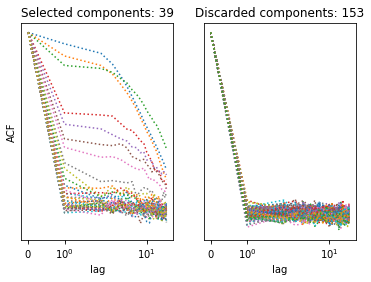

Tile 1
confidence is 0.9
th is 0.101080835705
mean_th is 0.101080835705
from cov 52


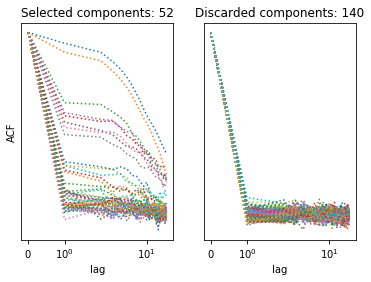

Tile 2
confidence is 0.9
th is 0.100892575612
mean_th is 0.100892575612
from cov 55


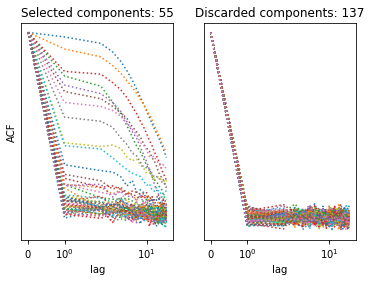

Tile 3
confidence is 0.9
th is 0.100779692712
mean_th is 0.100779692712
from cov 45


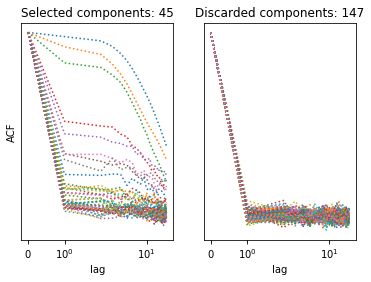

Tile 4
confidence is 0.9
th is 0.101023009219
mean_th is 0.101023009219
from cov 41


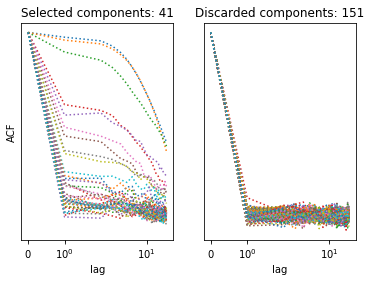

Tile 5
confidence is 0.9
th is 0.10046763071
mean_th is 0.10046763071
from cov 44


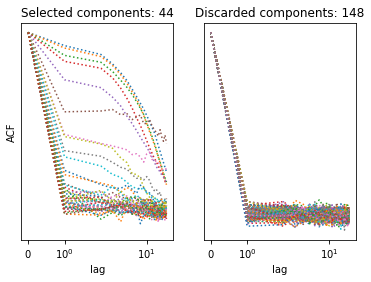

Tile 6
confidence is 0.9
th is 0.100854711939
mean_th is 0.100854711939
from cov 33


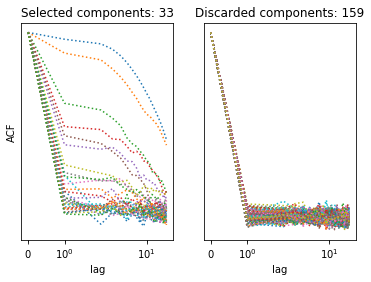

Tile 7
confidence is 0.9
th is 0.100523253383
mean_th is 0.100523253383
from cov 44


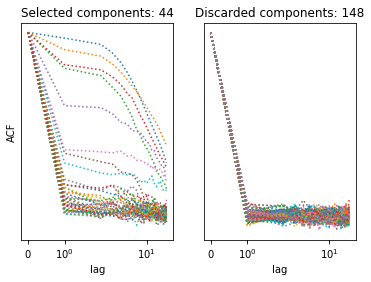

Tile 8
confidence is 0.9
th is 0.100864853084
mean_th is 0.100864853084
from cov 28


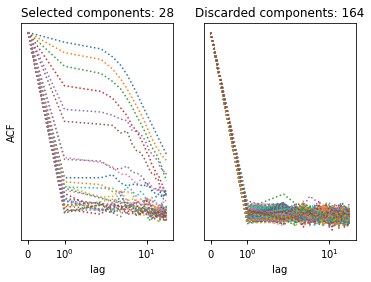

Tile 9
confidence is 0.9
th is 0.100884306445
mean_th is 0.100884306445
from cov 56


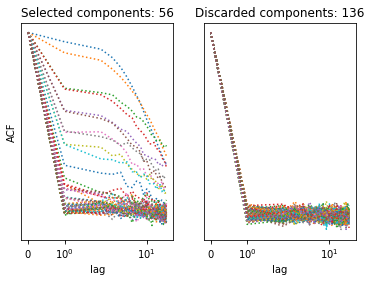

Tile 10
confidence is 0.9
th is 0.10123269825
mean_th is 0.10123269825
from cov 39


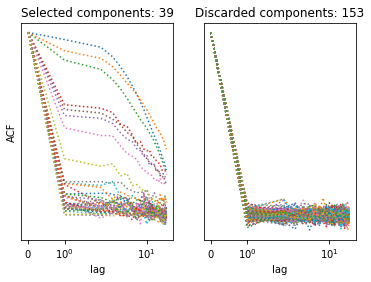

Tile 11
confidence is 0.9
th is 0.101010521403
mean_th is 0.101010521403
from cov 22


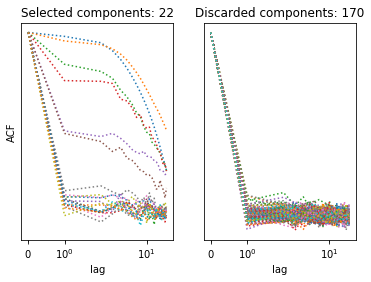

Tile 12
confidence is 0.9
th is 0.101171368641
mean_th is 0.101171368641
from cov 42


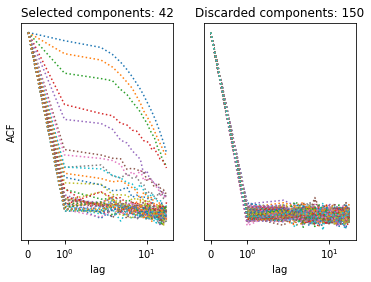

Tile 13
confidence is 0.9
th is 0.100989668954
mean_th is 0.100989668954
from cov 30


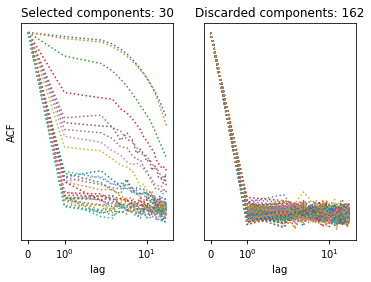

Tile 14
confidence is 0.9
th is 0.100861115743
mean_th is 0.100861115743
from cov 62


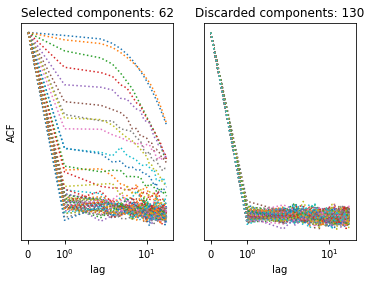

Tile 15
confidence is 0.9
th is 0.101105178015
mean_th is 0.101105178015
from cov 23


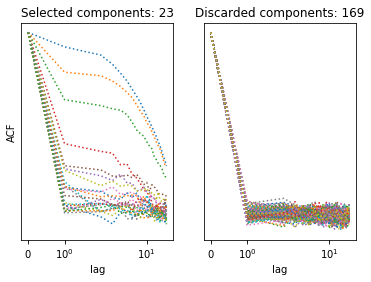

Tile 16
confidence is 0.9
th is 0.101052572407
mean_th is 0.101052572407
from cov 49


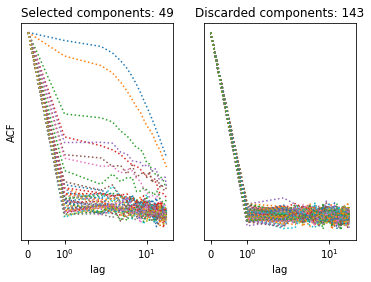

Tile 17
confidence is 0.9
th is 0.10070053335
mean_th is 0.10070053335
from cov 41


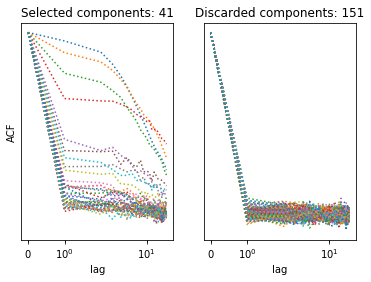

Tile 18
confidence is 0.9
th is 0.10073073524
mean_th is 0.10073073524
from cov 28


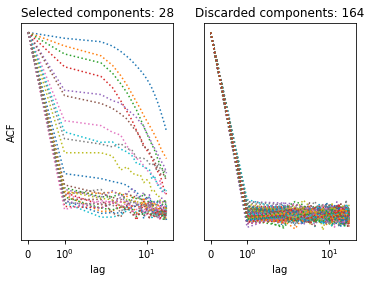

Tile 19
confidence is 0.9
th is 0.100974749994
mean_th is 0.100974749994
from cov 46


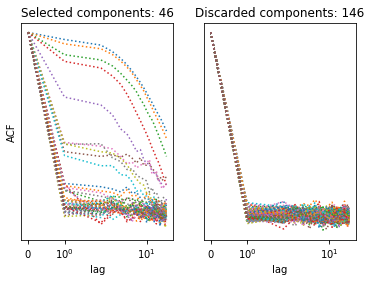

Tile 20
confidence is 0.9
th is 0.10122162341
mean_th is 0.10122162341
from cov 38


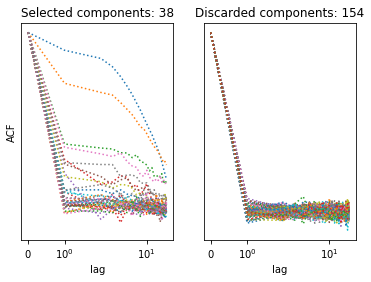

Tile 21
confidence is 0.9
th is 0.100785958412
mean_th is 0.100785958412
from cov 31


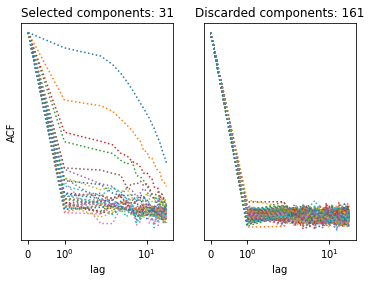

Tile 22
confidence is 0.9
th is 0.100637068236
mean_th is 0.100637068236
from cov 35


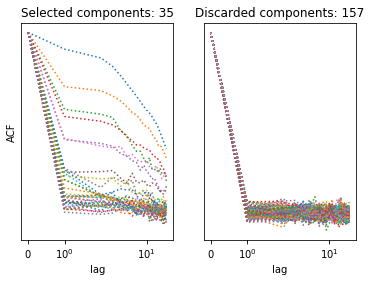

Tile 23
confidence is 0.9
th is 0.101406093541
mean_th is 0.101406093541
from cov 31


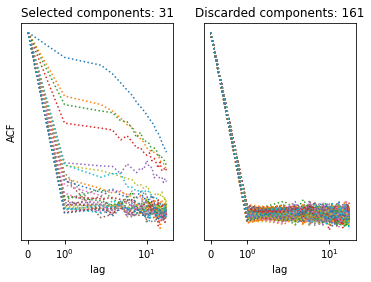

Tile 24
confidence is 0.9
th is 0.101312380875
mean_th is 0.101312380875
from cov 21


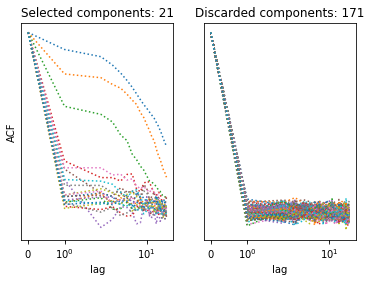

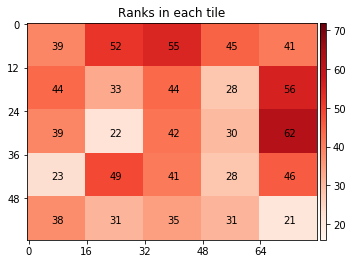

M rank 975


In [7]:
k = 25
tsub = 1
noise_norm = False
iterate = True 
confidence = 0.90 # confidence has to change according to data length
corr = True
kurto = False
tfilt = False


Yd, ranks = pre_svd.svd_patch(M,k,tsub=tsub,
                                  noise_norm=noise_norm,
                                  iterate=iterate,
                                  confidence=confidence,
                                  corr=corr,kurto=kurto,
                                 tfilt = tfilt)

In [8]:
import numpy as np
def image_block_ticks(Y, k=25):
    a = pre_svd.split_image_into_blocks(M,k)
    la = list(map(np.shape, a))
    dim_block = np.asarray(la)
    im_block = np.asarray(dim_block)
    cols, rows = dim_block.T[0] , dim_block.T[1]
    K = int(np.sqrt(len(dim_block)))
    row_array = np.insert(rows[::K+1], 0, 0).cumsum()
    col_array = np.insert(cols[::K+1], 0, 0).cumsum()
    return row_array , col_array

In [9]:
xticks, yticks = image_block_ticks(M,k=k)

In [12]:
# movie Y, Yd, R
movies=[M, Yd, M-Yd]
nmovies = list(map(uvideo.video_normalization,movies))
video = [nmovies]
gains=[[1,1,1]] # tune movie brightness
anim = uvideo.draw_video_init(video,max_time=500,gains=gains,xtick=xticks,ytick=yticks)

gains were given
Making 500 frames


In [ ]:
uvideo.draw_video(anim,fps=10,store=True,name='example_movies/tmp.mp4')